# Bermudan Swaption Pricing

Value a European Swaption using the Hull-White, Black-Derman-Toy and Black-Karasinski models. I analyse relationships to test the model pricing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.libor import *
from financepy.market.curves import *
from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK
from financepy.models.FinModelRatesBDT import FinModelRatesBDT

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 15 Sep 2020 at 23:22 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



## Discount Curve

In [75]:
valuationDate = FinDate(1, 1, 2011)
settlementDate = valuationDate

Set up flat discount curve at 6% (semi-annual compounding)

In [76]:
liborCurve = FinDiscountCurveFlat(valuationDate, 0.0625, FinFrequencyTypes.SEMI_ANNUAL)

# European Swaptions

We begin with European swaptions. European swaptions can be set up directly as European Swaptions or as Bermudan swaptions with an exercise type of EUROPEAN

In [77]:
exerciseDate = settlementDate.addTenor("1Y")
swapMaturityDate = settlementDate.addTenor("4Y")

swapFixedCoupon = 0.060
swapFixedFrequencyType = FinFrequencyTypes.SEMI_ANNUAL
swapFixedDayCountType = FinDayCountTypes.ACT_365F
swaptionType = FinLiborSwapTypes.PAYER 

In [78]:
exerciseDate

SUN 01 JAN 2012

In [79]:
swapMaturityDate

THU 01 JAN 2015

In [80]:
swaptionPay = FinLiborSwaption(settlementDate,
                               exerciseDate,
                               swapMaturityDate,
                               FinLiborSwapTypes.PAYER ,
                               swapFixedCoupon,
                               swapFixedFrequencyType,
                               swapFixedDayCountType)

In [81]:
swaptionRec = FinLiborSwaption(settlementDate,
                               exerciseDate,
                               swapMaturityDate,
                               FinLiborSwapTypes.RECEIVER,
                               swapFixedCoupon,
                               swapFixedFrequencyType,
                               swapFixedDayCountType)

## Valuation using Black's Model

Let's try the zero volatility limit first

In [107]:
model = FinModelBlack(0.00001)

In [108]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.31147
Recvr Value:   0.00000
PayV - RecV: 6193.31147


We can value the forward starting swap.

In [109]:
swap = FinLiborSwap(exerciseDate,
                    swapMaturityDate,
                    swapType,
                    swapFixedCoupon,
                    swapFixedFrequencyType,
                    swapFixedDayCountType)

In [110]:
swap.value(settlementDate, liborCurve, liborCurve)

6193.311465714156

At zero volatility the payer swaption is in the money and is just a forward starting swap so this makes sense.

Let's repeat with a non-zero volatility

In [111]:
model = FinModelBlack(0.20)

In [112]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 15721.54222
Recvr Value: 9528.23076
PayV - RecV: 6193.31147


The swaption values have changed. Put call parity keeps the difference equal to the value of the forward starting swap.

We can also value the European option using other models. Let's try Black-Karasinski.

## Valuation using Black-Karasinski

Start with the zero volatility limit

In [124]:
sigma = 0.00001
numTimeSteps = 200
model = FinModelRatesBK(sigma, a, numTimeSteps)

In [125]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.30557
Recvr Value:   0.00000
PayV - RecV: 6193.30557


Only the payer swaption is in the money and is worth the forward starting swap.

In [126]:
sigma = 0.20
numTimeSteps = 200
model = FinModelRatesBK(sigma, a, numTimeSteps)

In [127]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 15633.19291
Recvr Value: 9439.88154
PayV - RecV: 6193.31138


At 20% volatility the values are higher but put-call parity is obeyed.

## Valuation using Black-Derman-Toy

Check the zero volatility limit

In [136]:
sigma = 0.00001
numTimeSteps = 200
model = FinModelRatesBDT(sigma, numTimeSteps)

In [137]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 6193.08206
Recvr Value:   0.00000
PayV - RecV: 6193.08206


Same result as before.

In [138]:
sigma = 0.20
numTimeSteps = 200
model = FinModelRatesBDT(sigma, numTimeSteps)

In [139]:
valuePay = swaptionPay.value(settlementDate, liborCurve, model)
valueRec = swaptionRec.value(settlementDate, liborCurve, model)
valuePayRec = valuePay - valueRec
print("Payer Value: %9.5f"% valuePay)
print("Recvr Value: %9.5f"% valueRec)
print("PayV - RecV: %9.5f"% valuePayRec)

Payer Value: 15895.53194
Recvr Value: 9698.75866
PayV - RecV: 6196.77328


At 20% volatility the values are higher but put-call parity is obeyed.

# Bermudan Swaption Framework

I now examine the same swaption but I allow it to be Bermudan and use the tree models to value it. But first let me price it on the tree models as a European option.

In [18]:
europeanSwaptionPay = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwapTypes.PAYER,
                                               FinOptionExerciseTypes.EUROPEAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

In [19]:
europeanSwaptionRec = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwapTypes.RECEIVER,
                                               FinOptionExerciseTypes.EUROPEAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

### Valuation using BDT Model

The BDT model is a short rate model where $dln(r) = ... + \sigma dW$. It is therefore lognormal in the short rate with a time-varying volatility and is arbitrage-free. It is not equivalent to Black's model but is approximately close.

In [20]:
sigma = 0.20
numTimeSteps = 200
modelBDT = FinModelRatesBDT(sigma, numTimeSteps)

In [22]:
valuePay = europeanSwaptionPay.value(valuationDate, liborCurve, modelBDT)
print("EUROPEAN BK PAY Value:", valuePay)

EUROPEAN BK PAY Value: 41297.849350963894


In [23]:
valueRec = europeanSwaptionRec.value(valuationDate, liborCurve, modelBDT)
print("EUROPEAN BK PAY Value:", valueRec)

EUROPEAN BK PAY Value: 16866.479934995


In [24]:
valueParRec = valuePay - valueRec

In [25]:
print(valuePay, valueRec, valueParRec)

41297.849350963894 16866.479934995 24431.369415968893


The put-call parity number is not exactly equal to the above number.

In [26]:
print(europeanSwaptionPay)

OBJECT TYPE: FinLiborBermudanSwaption
EXERCISE DATE: MON 04 MAR 2019
MATURITY DATE: MON 04 MAR 2024
SWAP TYPE: FinLiborSwapTypes.PAYER
EXERCISE TYPE: FinOptionExerciseTypes.EUROPEAN
FIXED COUPON: 0.035
FIXED FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED DAYCOUNT TYPE: FinDayCountTypes.THIRTY_E_360_ISDA
FLOAT FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT DAYCOUNT TYPE: FinDayCountTypes.THIRTY_E_360
NOTIONAL: 1000000



# Bermudan Swaptions

This swaption can be exercised starting in one year and the underlying swap matures in 4 years

In [27]:
swapFixedFrequencyType = FinFrequencyTypes.SEMI_ANNUAL
swapFixedDayCountType = FinDayCountTypes.THIRTY_E_360_ISDA

The swaption is Bermudan so it can only be exercised on coupon payment dates

Create a payer swaption first

In [28]:
exerciseDate = settlementDate.addYears(1)
swapMaturityDate = settlementDate.addYears(4)
swapFixedCoupon = 0.060

In [29]:
bermudanSwaptionPay = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwapTypes.PAYER,
                                               FinOptionExerciseTypes.BERMUDAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

Create a receiver swaption

In [30]:
bermudanSwaptionRec = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwapTypes.RECEIVER,
                                               FinOptionExerciseTypes.BERMUDAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

## Valuation using the BK Model

In [31]:
sigma = 0.2012
a = 0.02
numTimeSteps = 200

In [32]:
modelBK = FinModelRatesBK(sigma, a, numTimeSteps)

Now specify the put and call dates

In [33]:
value = bermudanSwaptionPay.value(valuationDate, liborCurve, modelBK)
print("Bermudan BK PAY Value:", value)

Bermudan BK PAY Value: 36.98932215027288


In [34]:
value = bermudanSwaptionRec.value(valuationDate, liborCurve, modelBK)
print("Bermudan BK REC Value:", value)

Bermudan BK REC Value: 136193.87579359458


## Valuation using the BDT Model

In [35]:
sigma = 0.2012
numTimeSteps = 500

In [36]:
modelBDT = FinModelRatesBDT(sigma, numTimeSteps)

In [38]:
value = bermudanSwaptionPay.value(valuationDate, liborCurve, modelBDT)
print("Bermudan BDT PAY Value:", value)

Bermudan BDT PAY Value: 46.9917920839301


In [39]:
value = bermudanSwaptionRec.value(valuationDate, liborCurve, modelBDT)
print("Bermudan BDT REC Value:", value)

Bermudan BDT REC Value: 136190.09233441114


In [40]:
print(bermudanSwaptionPay)

OBJECT TYPE: FinLiborBermudanSwaption
EXERCISE DATE: WED 04 MAR 2015
MATURITY DATE: SUN 04 MAR 2018
SWAP TYPE: FinLiborSwapTypes.PAYER
EXERCISE TYPE: FinOptionExerciseTypes.BERMUDAN
FIXED COUPON: 0.06
FIXED FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED DAYCOUNT TYPE: FinDayCountTypes.THIRTY_E_360_ISDA
FLOAT FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT DAYCOUNT TYPE: FinDayCountTypes.THIRTY_E_360
NOTIONAL: 1000000



## Valuation using the HW Model

In [41]:
sigma = 0.01  # basis point volatility
a = 0.01
numTimeSteps = 100

In [42]:
modelHW = FinModelRatesHW(a, sigma, numTimeSteps)

In [44]:
value = bermudanSwaptionPay.value(valuationDate, liborCurve, modelHW)
print("Bermudan HW PAY Value:", value)

Bermudan HW PAY Value: 171.52038738392568


In [45]:
value = bermudanSwaptionRec.value(valuationDate, liborCurve, modelHW)
print("Bermudan HW REC Value:", value)

Bermudan HW REC Value: 136193.91237041343


# Convergence Testing

## BK Model

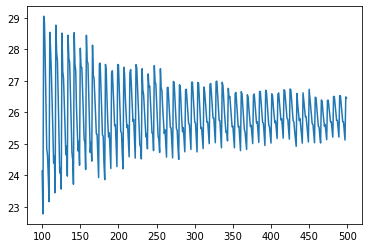

In [47]:
sigma = 0.2012
a = 0.04

timeSteps = range(100,500,1)
values = []
for numTimeSteps in timeSteps:
    modelBK = FinModelRatesBK(sigma, a, numTimeSteps)
    v = bermudanSwaptionPay.value(valuationDate, liborCurve, modelBK)
    values.append(v)

plt.plot(timeSteps, values);

## BDT Model

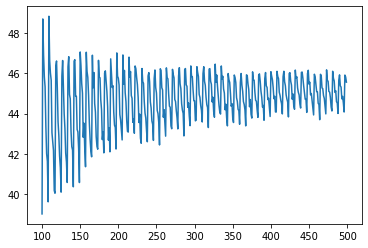

In [48]:
sigma = 0.2012

timeSteps = range(100,500,1)
values = []
for numTimeSteps in timeSteps:
    modelBDT = FinModelRatesBDT(sigma, numTimeSteps)
    v = bermudanSwaptionPay.value(settlementDate, liborCurve, modelBDT)
    values.append(v)
    
plt.plot(timeSteps, values);

## HW Model

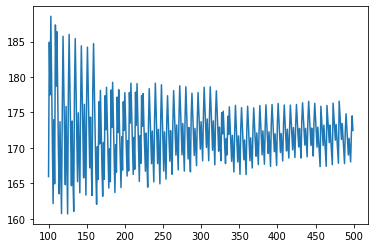

In [49]:
sigma = 0.01  # basis point volatility
a = 0.01
timeSteps = range(100,500,1)
values = []

for numTimeSteps in timeSteps:
    modelHW = FinModelRatesHW(a, sigma, numTimeSteps)
    v = bermudanSwaptionPay.value(settlementDate, liborCurve, modelHW)
    values.append(v)
    
plt.plot(timeSteps, values);

In all 3 cases there is something happening at 300 time steps that needs investigation

Copyright (c) 2020 Dominic O'Kane